In [1]:
import warnings
warnings.filterwarnings('ignore')
import glob
import numpy as np
import pandas as pd
from astropy.io import fits as pyfits
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import matplotlib as mpl
# use precise epoch
mpl.rcParams['date.epoch'] = '1970-01-01T00:00:00'
try:
    mdates.set_epoch('1970-01-01T00:00:00')
except:
    pass

data_dir = '/home/mnedal/data'
mydate = '2025-03-25'

In [2]:
year, month, day = mydate.split('-')

In [15]:
# files = glob.glob(f'{data_dir}/NDA_{day}{month}{year}_*.fits')

files = glob.glob(f'{data_dir}/int_orf{year}{month}{day}_*.fts')

orfees_data = pyfits.open(files[0])
orfees_data.info()

Filename: /home/mnedal/data/int_orf20250325_053100_0.1.fts
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   ()      
  1  FREQUENCIES    1 BinTableHDU     37   1R x 11C   [1J, 1J, 431E, 1J, 215E, 1J, 164E, 1J, 86E, 1J, 102E]   
  2  SPECTRA       1 BinTableHDU     78   358292R x 15C   [1J, 431E, 431E, 1J, 215E, 215E, 1J, 164E, 164E, 1J, 86E, 86E, 1J, 102E, 102E]   


In [45]:
orfees_data[1].header

XTENSION= 'BINTABLE'           /                                                
BITPIX  =                   +8 /                                                
NAXIS   =                   +2 /                                                
EXTNAME = 'FREQUENCIES'        /                                                
NAXIS1  =                +4016 /                                                
NAXIS2  =                   +1 /                                                
PCOUNT  =                   +0 /                                                
GCOUNT  =                   +1 /                                                
FREQUNIT=                   +6 / in MHz                                         
TFIELDS =                  +11 / # columns binary table                         
TFORM1  = '1J      '           /                                                
TTYPE1  = 'N_BANDS '           / # bands                                        
TFORM2  = '1J      '        

In [24]:
[x for x in dir(orfees_data[1].data) if not x.startswith('_')]

['T',
 'all',
 'any',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'astype',
 'base',
 'byteswap',
 'choose',
 'clip',
 'columns',
 'compress',
 'conj',
 'conjugate',
 'copy',
 'ctypes',
 'cumprod',
 'cumsum',
 'data',
 'diagonal',
 'dot',
 'dtype',
 'dump',
 'dumps',
 'field',
 'fill',
 'flags',
 'flat',
 'flatten',
 'formats',
 'from_columns',
 'getfield',
 'imag',
 'item',
 'itemset',
 'itemsize',
 'max',
 'mean',
 'min',
 'names',
 'nbytes',
 'ndim',
 'newbyteorder',
 'nonzero',
 'partition',
 'prod',
 'ptp',
 'put',
 'ravel',
 'real',
 'repeat',
 'reshape',
 'resize',
 'round',
 'searchsorted',
 'setfield',
 'setflags',
 'shape',
 'size',
 'sort',
 'squeeze',
 'std',
 'strides',
 'sum',
 'swapaxes',
 'take',
 'tobytes',
 'tofile',
 'tolist',
 'tostring',
 'trace',
 'transpose',
 'var',
 'view']

In [43]:
orfees_data[1].data.dtype

dtype((numpy.record, [('N_BANDS', '>i4'), ('NP_B1', '>i4'), ('FREQ_B1', '>f4', (431,)), ('NP_B2', '>i4'), ('FREQ_B2', '>f4', (215,)), ('NP_B3', '>i4'), ('FREQ_B3', '>f4', (164,)), ('NP_B4', '>i4'), ('FREQ_B4', '>f4', (86,)), ('NP_B5', '>i4'), ('FREQ_B5', '>f4', (102,))]))

In [40]:
orfees_data[1].data.tolist()[0]

[5,
 431,
 [144.1300048828125,
  144.52000427246094,
  144.91000366210938,
  145.3000030517578,
  145.69000244140625,
  146.9600067138672,
  148.08999633789062,
  148.42999267578125,
  148.82000732421875,
  149.2100067138672,
  149.60000610351562,
  149.99000549316406,
  150.3800048828125,
  150.77000427246094,
  151.16000366210938,
  151.5500030517578,
  152.72000122070312,
  153.1199951171875,
  153.50999450683594,
  153.89999389648438,
  154.2899932861328,
  154.67999267578125,
  155.07000732421875,
  155.4600067138672,
  155.85000610351562,
  156.24000549316406,
  156.6300048828125,
  157.02000427246094,
  157.41000366210938,
  157.8000030517578,
  158.19000244140625,
  158.5800018310547,
  158.97000122070312,
  159.3699951171875,
  159.75999450683594,
  160.14999389648438,
  160.5399932861328,
  160.92999267578125,
  161.32000732421875,
  161.7100067138672,
  162.10000610351562,
  162.49000549316406,
  162.8800048828125,
  163.27000427246094,
  163.66000366210938,
  164.0500030517

In [30]:
orfees_data[1].data.item()

(5,
 431,
 array([144.13, 144.52, 144.91, 145.3 , 145.69, 146.96, 148.09, 148.43,
        148.82, 149.21, 149.6 , 149.99, 150.38, 150.77, 151.16, 151.55,
        152.72, 153.12, 153.51, 153.9 , 154.29, 154.68, 155.07, 155.46,
        155.85, 156.24, 156.63, 157.02, 157.41, 157.8 , 158.19, 158.58,
        158.97, 159.37, 159.76, 160.15, 160.54, 160.93, 161.32, 161.71,
        162.1 , 162.49, 162.88, 163.27, 163.66, 164.05, 164.44, 164.83,
        165.22, 165.62, 166.01, 166.4 , 166.79, 167.18, 167.57, 167.96,
        168.35, 168.74, 169.13, 169.52, 169.91, 170.3 , 170.69, 171.08,
        171.47, 171.87, 172.26, 172.65, 173.04, 173.43, 173.82, 174.21,
        174.6 , 174.99, 175.38, 175.77, 176.16, 176.46, 177.72, 178.12,
        178.51, 178.9 , 179.29, 179.68, 180.07, 180.46, 180.85, 181.24,
        181.63, 182.02, 182.41, 182.8 , 183.19, 183.58, 183.97, 184.37,
        184.76, 185.15, 185.54, 185.93, 186.32, 186.71, 187.1 , 187.49,
        187.88, 188.27, 188.66, 189.05, 189.44, 189.83

In [4]:
# define x and y axes
orfees_freq = pd.DataFrame(orfees_data[3].data).values.reshape(-1)
orfees_time = pd.DataFrame(orfees_data[4].data).values.reshape(-1)

orfees_arr1 = orfees_data[1].data
orfees_arr2 = orfees_data[2].data

orfees_arr1 = 10 * np.log10(orfees_arr1) # Convert the amplitude to decibels
orfees_arr2 = 10 * np.log10(orfees_arr2) # Convert the amplitude to decibels

datetime_obj_start = orfees_data[0].header['DATE-OBS'] + ' ' + orfees_data[0].header['TIME-OBS']
datetime_obj_end   = orfees_data[0].header['DATE-OBS'] + ' ' + orfees_data[0].header['TIME-END']

start_obs_time = datetime.strptime(datetime_obj_start, '%d/%m/%Y %H:%M:%S')
end_obs_time   = datetime.strptime(datetime_obj_end, '%d/%m/%Y %H:%M:%S')

time_in_seconds = orfees_data[4].data['time_in_seconds']
times = [start_obs_time + timedelta(seconds=ts) for ts in time_in_seconds]

In [5]:
if len(times) < orfees_arr1.shape[1]:
    # num of missed time steps
    n_miss = [orfees_arr1.shape[1] - len(times)]
    dt = np.diff(time_in_seconds)[-1] # time cadence
    for n in n_miss:
        times.append(times[-1] + timedelta(seconds=dt))

assert len(times) == orfees_arr1.shape[1], 'Length of time axis does not match the data array x-dim'

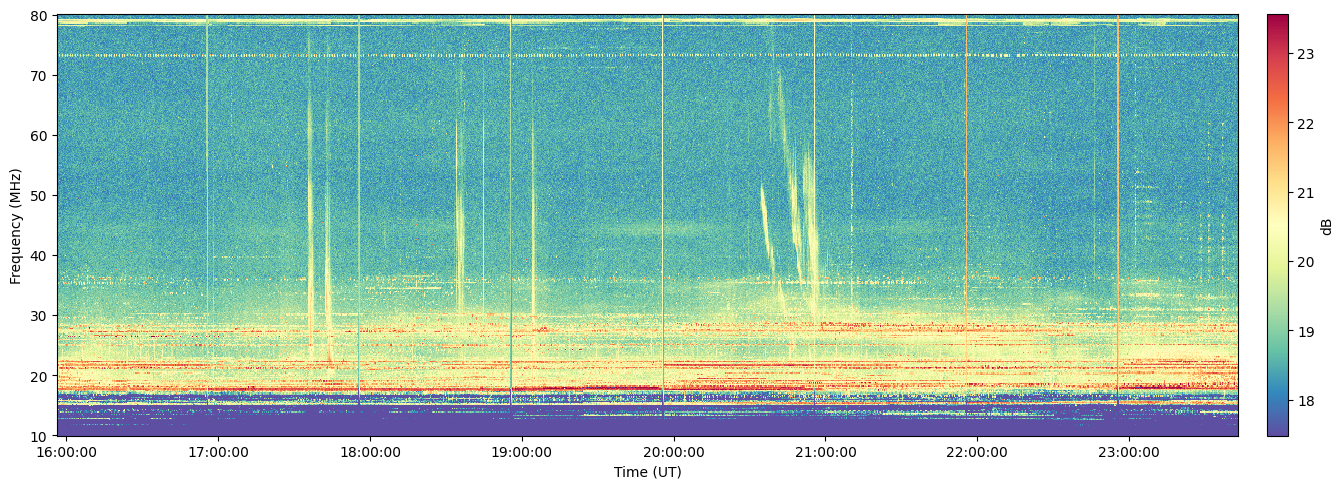

In [6]:
fig = plt.figure(figsize=[15,5])
ax = fig.add_subplot(111)
pc = ax.pcolormesh(times, orfees_freq, orfees_arr1,
                   vmin=np.nanpercentile(orfees_arr1, 7),
                   vmax=np.nanpercentile(orfees_arr1, 99.97),
                   shading='nearest', cmap='Spectral_r')
fig.colorbar(pc, ax=ax, pad=0.02, label='dB')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
fig.tight_layout()
plt.show()

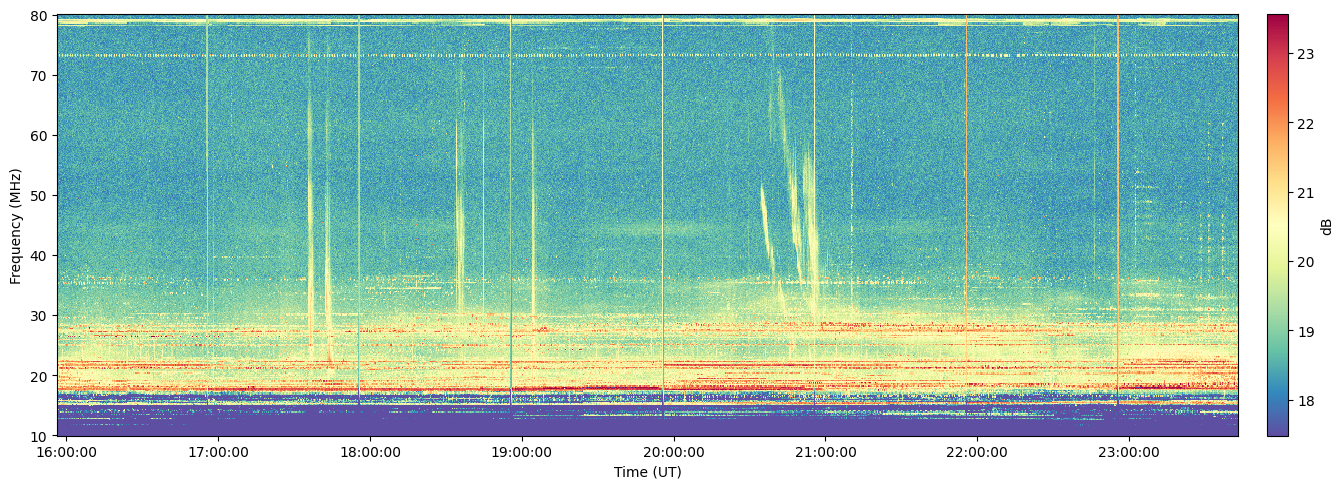

In [8]:
fig = plt.figure(figsize=[15,5])
ax = fig.add_subplot(111)
pc = ax.pcolormesh(times, orfees_freq, orfees_arr2,
                   vmin=np.nanpercentile(orfees_arr2, 7),
                   vmax=np.nanpercentile(orfees_arr2, 99.97),
                   shading='nearest', cmap='Spectral_r')
fig.colorbar(pc, ax=ax, pad=0.02, label='dB')
ax.set_xlabel('Time (UT)')
ax.set_ylabel('Frequency (MHz)')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
fig.tight_layout()
plt.show()

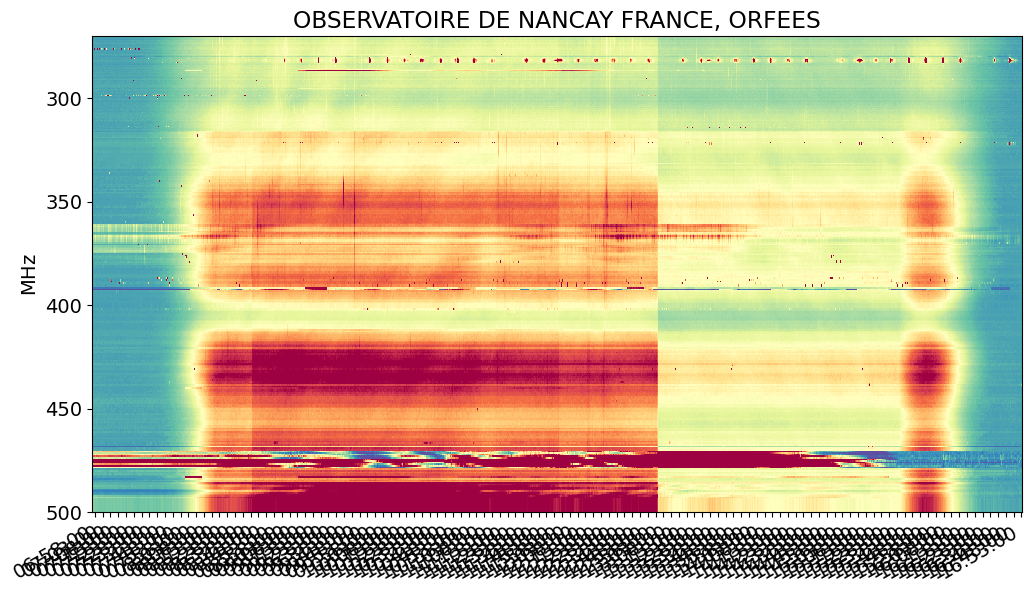

In [50]:
#### Plot ORFEES spectra
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import time, os, pdb
import time, os
from matplotlib import dates
import matplotlib.ticker as ticker
import argparse
from datetime import datetime
from matplotlib import dates
import matplotlib as mpl
mpl.rcParams.update({'font.size': 14})
from astropy.io import fits
import astropy.units as u
from sunpy.net import Fido, attrs as a
from astropy.time import Time
from matplotlib.colors import LogNorm
from radiospectra.spectrogram2 import Spectrogram

orfees = fits.open(files[0])

orfees_i = np.hstack([orfees[2].data[f'STOKESI_B{i}'] for i in range(1, 6)]).T
data = orfees_i.T

for i in range(data.shape[0]):
	data[i] = data[i]/data[-1]

data = data.T
#pdb.set_trace()

orfees_time_str = orfees[0].header['DATE-OBS']
# pdb.set_trace()
orfees_times = Time(orfees_time_str) + (orfees[2].data['TIME_B1']/1000)*u.s # times are not the same for all sub spectra!
orfees_freqs = np.hstack([orfees[1].data[f'FREQ_B{i}'] for i in range(1, 6)]) *u.MHz

orfees_meta = {
    'observatory': orfees[0].header['ORIGIN'],
    'instrument': orfees[0].header['INSTRUME'],
    'detector': orfees[0].header['INSTRUME'],
    'freqs': orfees_freqs.reshape(-1),
    'times': orfees_times,
    'wavelength': a.Wavelength(orfees_freqs[0,0], orfees_freqs[0,-1]),
    'start_time': orfees_times[0],
    'end_time': orfees_times[-1]
}

###### Plot the spec
orfees_spec_i = Spectrogram(data, orfees_meta)
#pdb.set_trace()
vmm = np.percentile(orfees_spec_i.data, [1,96])
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111)
#orfees_spec_i.plot(axes = ax, norm=LogNorm(vmin=vmm[0], vmax=vmm[1]), cmap = 'Spectral_r')
orfees_spec_i.plot(axes = ax, vmin=vmm[0], vmax=vmm[1], cmap = 'Spectral_r')
ax.set_ylim(500,270)
# ax.set_xlim(datetime(2025, 3, 26, 9, 5), datetime(2025, 3, 26, 9, 50))
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=5))
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M:%S'))
plt.show()